In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import numpy as np
%matplotlib notebook


<IPython.core.display.Javascript object>


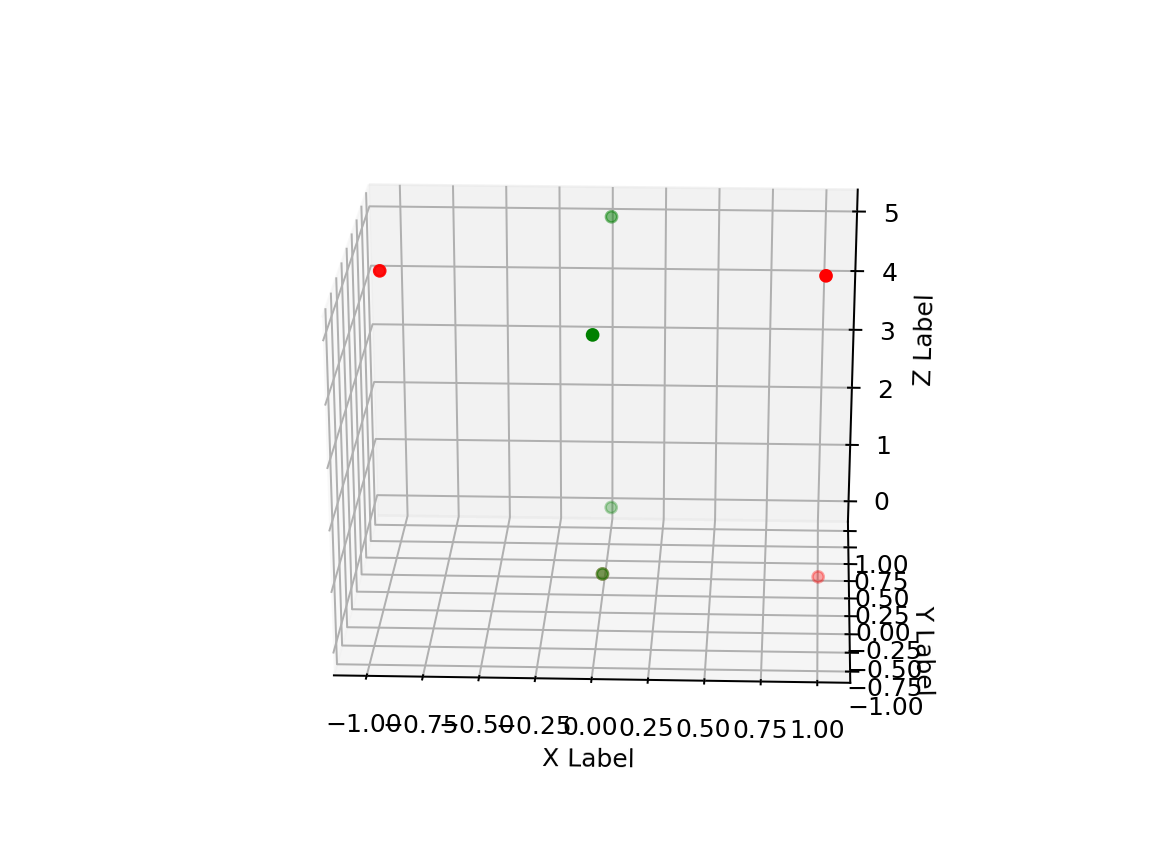

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

points = np.array([
    [0,1,1,-1],
    [0,0,0,0],
    [0,0,5,5]])

r = R.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])

points_rotated = r.as_matrix()@points

ax.scatter(points[0,:], points[1,:], points[2,:], c='r', marker='o')
ax.scatter(points_rotated[0,:], points_rotated[1,:], points_rotated[2,:], c='g', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
r.as_matrix().shape

(3, 3)

In [33]:
k = np.array([[1,0,0]])
k2 = np.array([[1,0,5]])
k3 = np.vstack([k,k2]).T
print(k3.shape)
# print(r.shape, k.T.shape)
kr = r.as_matrix()@(k3)
print(kr)

(3, 2)
[[2.22044605e-16 2.22044605e-16]
 [1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.00000000e+00]]


### import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

fig = ...

In [54]:
# R??
r.apply?

In [85]:
def rotation_matrix_3d(theta):
    """Frame rotation matrix"""
#     theta -= np.pi / 2 #WHY?
    r = R.from_quat([0, 0, np.sin(theta/2), np.cos(theta/2)]).as_matrix()
    return r

In [109]:
def rotate(points, theta):
    theta -= np.pi / 2 #WHY?
    r = R.from_quat([0, 0, np.sin(theta/2), np.cos(theta/2)])
    points_rotated=r.apply(points)
    return points_rotated


In [122]:
print(points2)
pr2= rotate(points2, np.pi).astype(int)
print(pr2)
print(pr2 + np.array([10,100,1000]))

[[ 0  0  0]
 [ 1  0  0]
 [ 1  0  5]
 [-1  0  5]]
[[ 0  0  0]
 [ 0  1  0]
 [ 0  1  5]
 [ 0 -1  5]]
[[  10  100 1000]
 [  10  101 1000]
 [  10  101 1005]
 [  10   99 1005]]


In [86]:
def transform_local_to_world(pose, points):
    """Transform local coordinates to world coordinates"""
    x, y, z, theta = pose
    points_rotated = rotate(points,theta) #verify
    return points_rotated + np.array([x, y, z])

In [ ]:
# vectors = np.array([
# [1, 0, 0],
# [1, 2, 3]])
# r = R.from_rotvec([0, 0, np.pi/4])
# r.as_matrix()
# array([[ 0.70710678, -0.70710678,  0.        ],
#        [ 0.70710678,  0.70710678,  0.        ],
#        [ 0.        ,  0.        ,  1.        ]])
# r.apply(vectors)
# array([[ 0.70710678,  0.70710678,  0.        ],
#        [-0.70710678,  2.12132034,  3.        ]])
# r.apply(vectors).shape
# (2, 3)